Import dữ liệu

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Đọc dữ liệu
df = pd.read_csv("../data/Mall_Customers.csv")

df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Chọn các biến đầu vào
Trong dataset, ta chọn 2 biến quan trọng:

- **Annual Income (k$)** → thu nhập hàng năm  
- **Spending Score (1–100)** → mức độ chi tiêu đánh giá theo thang điểm


In [3]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X.head()


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


 Áp dụng K-Means Clustering với k = 3, 4, 5

Chúng ta sẽ thử phân cụm với 3 giá trị k khác nhau (3, 4, 5) và vẽ biểu đồ cho mỗi k để xem kết quả phân nhóm.

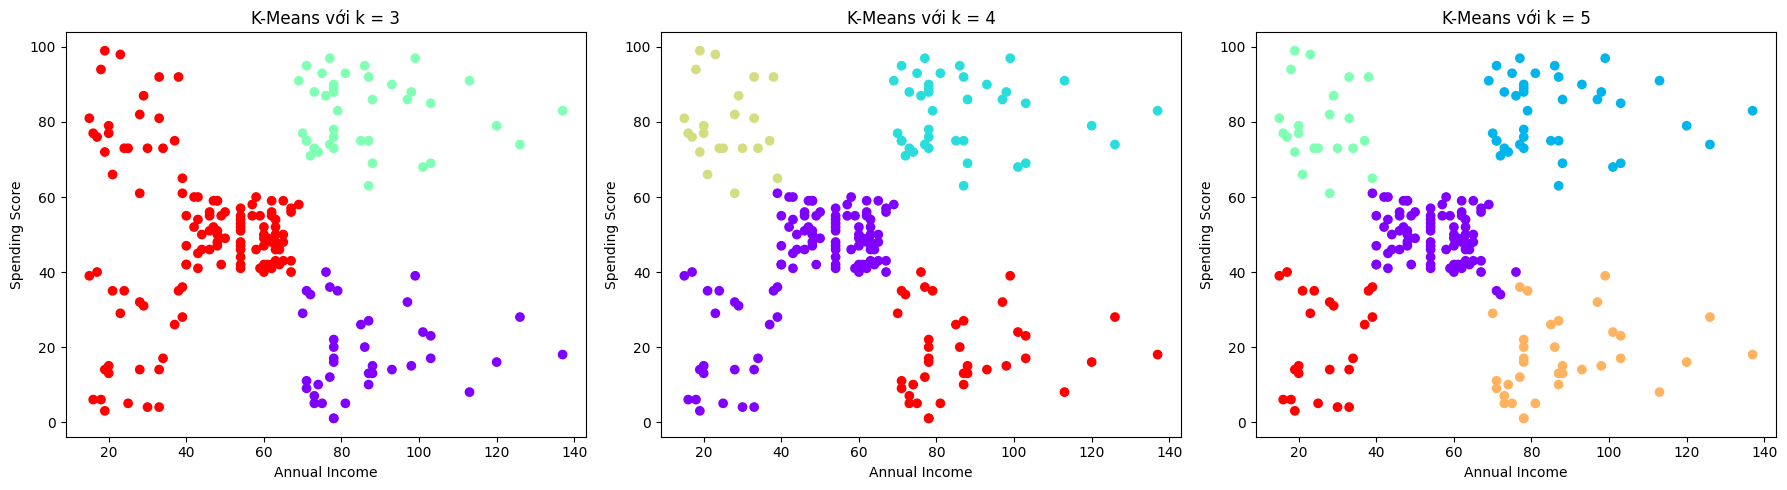

In [7]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

for i, k in enumerate([3, 4, 5]):
    km = KMeans(n_clusters=k, random_state=42)
    df[f'cluster_{k}'] = km.fit_predict(X)
    
    axs[i].scatter(X.iloc[:, 0], X.iloc[:, 1], c=df[f'cluster_{k}'], cmap='rainbow')
    axs[i].set_title(f'K-Means với k = {k}')
    axs[i].set_xlabel("Annual Income")
    axs[i].set_ylabel("Spending Score")

plt.tight_layout()
plt.show()


Chọn số lượng cụm k tốt nhất (tùy chọn)

Sử dụng **Elbow Method** để xác định số cụm tối ưu (k), giúp mô hình phân cụm hiệu quả hơn.

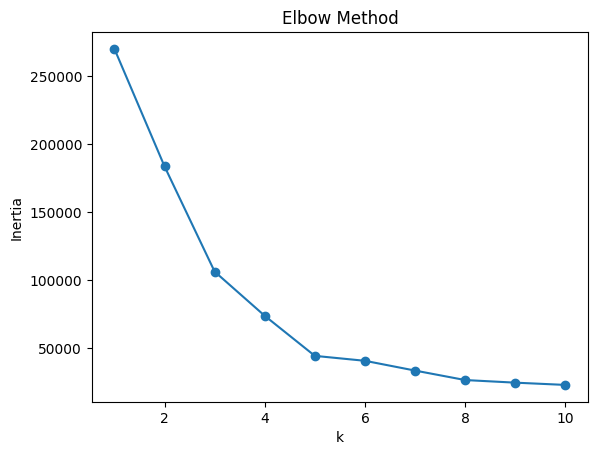

In [8]:
inertias = []

for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertias.append(km.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


. Huấn luyện mô hình với k = 5

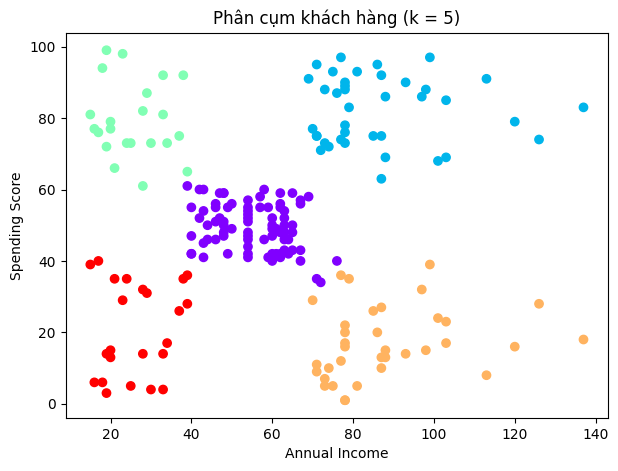

In [9]:
# K-Means với k = 5
k = 5
km = KMeans(n_clusters=k, random_state=42)
df['cluster'] = km.fit_predict(X)

# Vẽ biểu đồ phân cụm
plt.figure(figsize=(7, 5))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=df['cluster'], cmap='rainbow')
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title(f"Phân cụm khách hàng (k = {k})")
plt.show()


### 6. Nhận xét các nhóm khách hàng

Dựa vào kết quả phân cụm, ta nhận xét như sau:

- **Cụm 0 (Thu nhập thấp, Chi tiêu thấp)**: Nhóm khách hàng chi tiêu ít và có thu nhập thấp.
- **Cụm 1 (Thu nhập thấp, Chi tiêu cao)**: Khách hàng thu nhập thấp nhưng chi tiêu nhiều.
- **Cụm 2 (Thu nhập trung bình, Chi tiêu trung bình)**: Nhóm khách hàng ổn định về thu nhập và chi tiêu.
- **Cụm 3 (Thu nhập cao, Chi tiêu thấp)**: Khách hàng thu nhập cao nhưng chi tiêu ít.
- **Cụm 4 (Thu nhập cao, Chi tiêu cao)**: Nhóm khách hàng VIP, có tiềm năng cao trong tiêu dùng.

### 🧠 Ý nghĩa:
- Các nhóm khách hàng này có thể được sử dụng để thiết kế các chiến lược marketing và chăm sóc khách hàng khác nhau.
